#### importing modules & reproducibility

In [1]:
# import modules
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Fixing random state for reproducibility
np.random.seed(387)

# ***Preprocessing***

In [2]:
# read data
characters = pd.read_csv('datasets/Characters.csv', sep=';')
hp1 = pd.read_csv('datasets/Harry Potter 1.csv', sep=';')
hp2 = pd.read_csv('datasets/Harry Potter 2.csv', sep=';')
hp3 = pd.read_csv('datasets/Harry Potter 3.csv', sep=';')

## ***profiling structure***
### fixing books data

In [3]:
trilogy = [hp1, hp2, hp3] 

# changing books columns and values to lower case
'''if not other cols would be created because of name differences'''
for book in trilogy:
    book.columns = hp1.columns.str.lower()
    book['character'] = book['character'].str.lower() # character column
    book['sentence'] = book['sentence'].str.lower()   # sentence column

In [4]:
# vertical concatenation of books
combined = pd.concat([hp1, hp2, hp3], ignore_index=True)
combined.head()

,character,sentence
0,dumbledore,"i should've known that you would be here, prof..."
1,mcgonagall,"good evening, professor dumbledore."
2,mcgonagall,"are the rumors true, albus?"
3,dumbledore,"i'm afraid so, professor."
4,dumbledore,the good and the bad.


### fixing characters data

In [5]:
# changing characters columns to lower case
'''if not other cols would be created because of name differences'''
characters.columns = characters.columns.str.lower()

In [6]:
# columns to date format
characters['birth'] = pd.to_datetime(characters['birth'], errors='coerce')
characters['death'] = pd.to_datetime(characters['death'], errors='coerce')

In [7]:
# get non numerical values
non_num = characters.select_dtypes(exclude=['int64','float64','datetime','timedelta'])
num     = characters.select_dtypes(exclude=['object'])

non_num.columns

Index(['name', 'gender', 'job', 'house', 'wand', 'patronus', 'species',
       'blood status', 'hair colour', 'eye colour', 'loyalty', 'skills'],
      dtype='object')

In [8]:
# changing character non_num values to lowercase
for column in non_num.columns:
    non_num[column] = non_num[column].str.lower() #lowercase

characters[non_num.columns] = non_num # replace in original table
characters.head(2) # inspect

,id,name,gender,job,house,wand,patronus,species,blood status,hair colour,eye colour,loyalty,skills,birth,death
0,1,harry james potter,male,student,gryffindor,"11"" holly phoenix feather",stag,human,half-blood,black,bright green,albus dumbledore | dumbledore's army | order o...,parseltongue| defence against the dark arts | ...,1980-07-31,NaT
1,2,ronald bilius weasley,male,student,gryffindor,"12"" ash unicorn tail hair",jack russell terrier,human,pure-blood,red,blue,dumbledore's army | order of the phoenix | hog...,wizard chess | quidditch goalkeeping,1980-03-01,NaT


# Plots :
### Characters with the most sentences
#### top 15 of the first 3 movies 

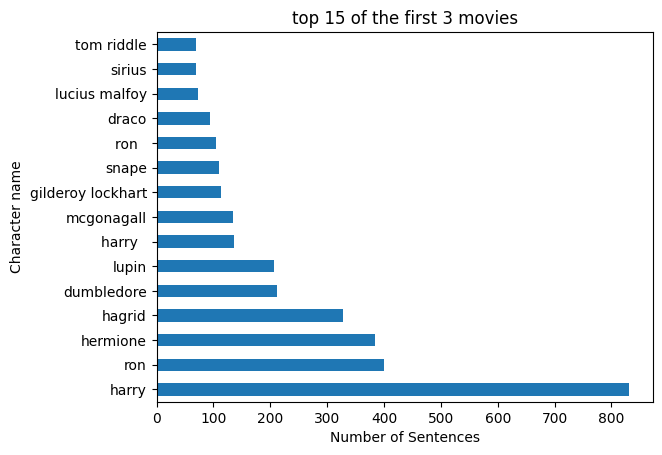

In [9]:
%matplotlib inline
df = combined
df = df.groupby('character').count()
df = df.sort_values(by='sentence',ascending=False)
df = df.head(15)
df['sentence'].plot(kind='barh')
plt.title('top 15 of the first 3 movies')
plt.xlabel('Number of Sentences')
plt.ylabel('Character name')
plt.show()


### Most popular words in first 3 movies

In [10]:
# Split the sentences into a list of words
df = combined
df["sentence"] = df["sentence"].str.split()

# Flatten the list of words
words = [word for sentence in df["sentence"] for word in sentence]

# Find the 15 most common words
common_words = pd.Series(words).value_counts().head(15)
print(common_words)

the     902
you     846
to      725
i       641
a       538
of      428
and     356
it      281
be      263
that    263
is      253
in      244
your    222
what    202
have    183
dtype: int64
